In [1]:
import json
import pandas
import seaborn
import requests
from tqdm import tqdm
from itertools import cycle
from matplotlib import pyplot as plt

In [2]:
cycol = cycle('bgrcmk')
seaborn.set_theme()

In [3]:
def get_by_zipcode(zipcodes):
    results = []
    for zipcode in tqdm(zipcodes) :
        r = requests.get(f'https://api.cquest.org/dvf?code_postal={zipcode}')
        results = results + json.loads(r.text)['resultats']
    return results

In [8]:
zipcodes = ["130{:02d}".format(i) for i in range(1,17)]

In [9]:
results = get_by_zipcode(zipcodes)

100%|██████████| 16/16 [10:30<00:00, 39.38s/it]


In [10]:
print(f"number of rows : {len(results)}")

number of rows : 152293


In [11]:
df = pandas.DataFrame(results)
df = df.drop(["articles_1", "articles_2", "articles_3", 
              "articles_4", "articles_5", "numero_disposition",
              "reference_document", "code_service_ch", "commune", 
              "code_departement", "code_commune", "prefixe_section",
              "section", "numero_plan", "numero_volume", "lot_1", 
              "surface_lot_1", "lot_2", "surface_lot_2", "lot_3",
              "surface_lot_3", "lot_4", "surface_lot_4", "lot_5", 
              "surface_lot_51", "nombre_lots", "code_type_local", 
              "type_local", "identifiant_local", "surface_relle_bati",     
              "nature_culture_speciale", "geom"], 1) 

In [12]:
df["date_mutation"] = pandas.to_datetime(df["date_mutation"], format="%Y-%m-%d")
df["code_postal"] = df["code_postal"].astype("category")
df['day'] = df.date_mutation.dt.day
df['month'] = df.date_mutation.dt.month
df['year'] = df.date_mutation.dt.year
df["valeur_fonciere"] = df["valeur_fonciere"].astype("float")
df = df.sort_values(by="date_mutation")

In [13]:
df.tail(5)

,date_mutation,nature_mutation,valeur_fonciere,numero_voie,suffixe_numero,type_voie,code_voie,voie,code_postal,nombre_pieces_principales,nature_culture,surface_terrain,lat,lon,day,month,year
72826,2019-06-28,Vente,222600.0,1,None,AV,0179,ALEXANDRE DUMAS,13008,3.0,None,NaN,43.264119,5.391124,28,6,2019
72825,2019-06-28,Vente,222600.0,1,None,AV,0179,ALEXANDRE DUMAS,13008,0.0,None,NaN,43.264119,5.391124,28,6,2019
72800,2019-06-28,Vente,222600.0,1,None,AV,0179,ALEXANDRE DUMAS,13008,0.0,None,NaN,43.264119,5.391124,28,6,2019
41834,2019-06-28,Vente,93000.0,20,None,RUE,0210,D ALGER,13006,2.0,None,NaN,43.289089,5.388687,28,6,2019
76343,2019-06-28,Vente,145000.0,9001,None,None,A125,BEAUVALLON PINEDE,13009,3.0,None,NaN,43.239698,5.408506,28,6,2019


In [14]:
print(f"We have data from {df.date_mutation.min()} to {df.date_mutation.max()}")  

We have data from 2014-01-02 00:00:00 to 2019-06-28 00:00:00


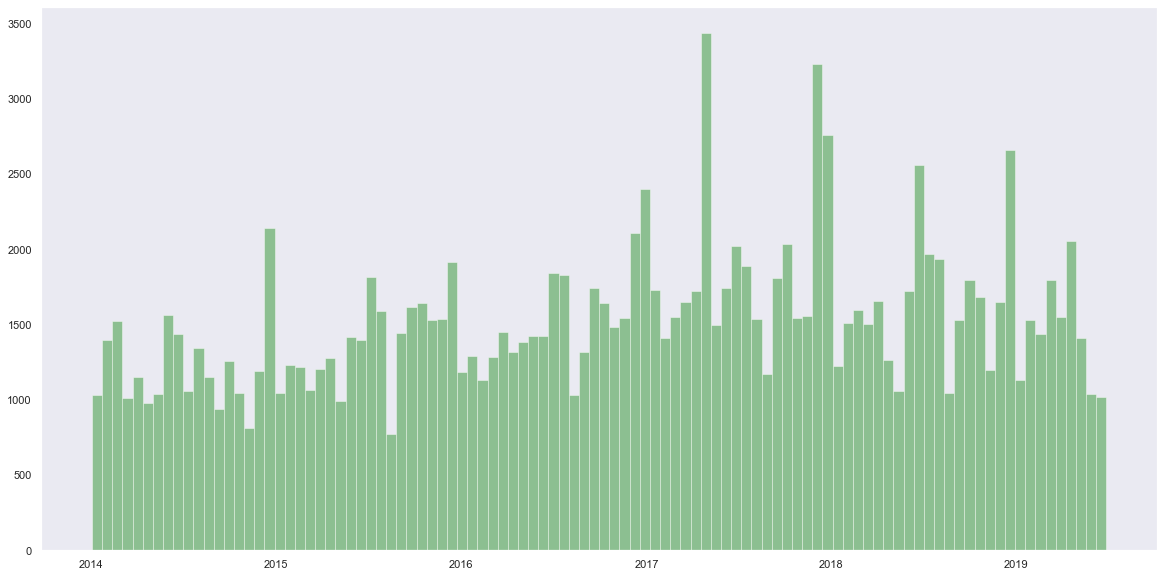

In [15]:
plt.figure(figsize=(20,10))
_ = df["date_mutation"].hist(bins=100, color="green", alpha = 0.4)
plt.grid(False)

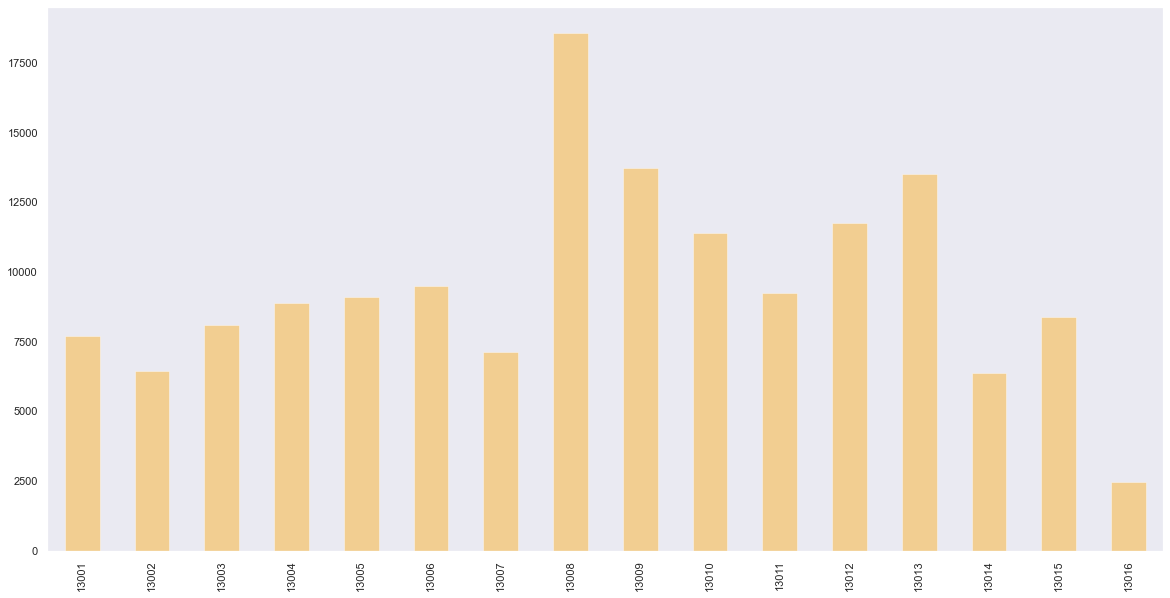

In [16]:
plt.figure(figsize=(20,10))
_ = df["code_postal"].value_counts()[zipcodes].plot(kind="bar", color="orange", alpha=0.4)
plt.grid(False)

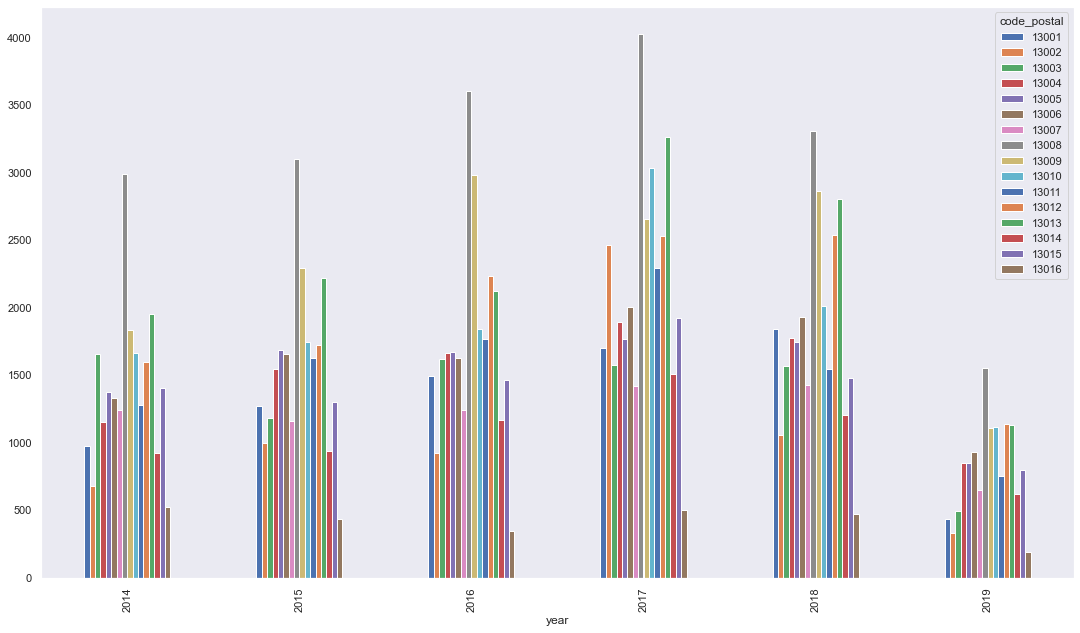

In [17]:
_ = df.groupby(['year', 'code_postal']).size().unstack().plot.bar()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.grid(False)

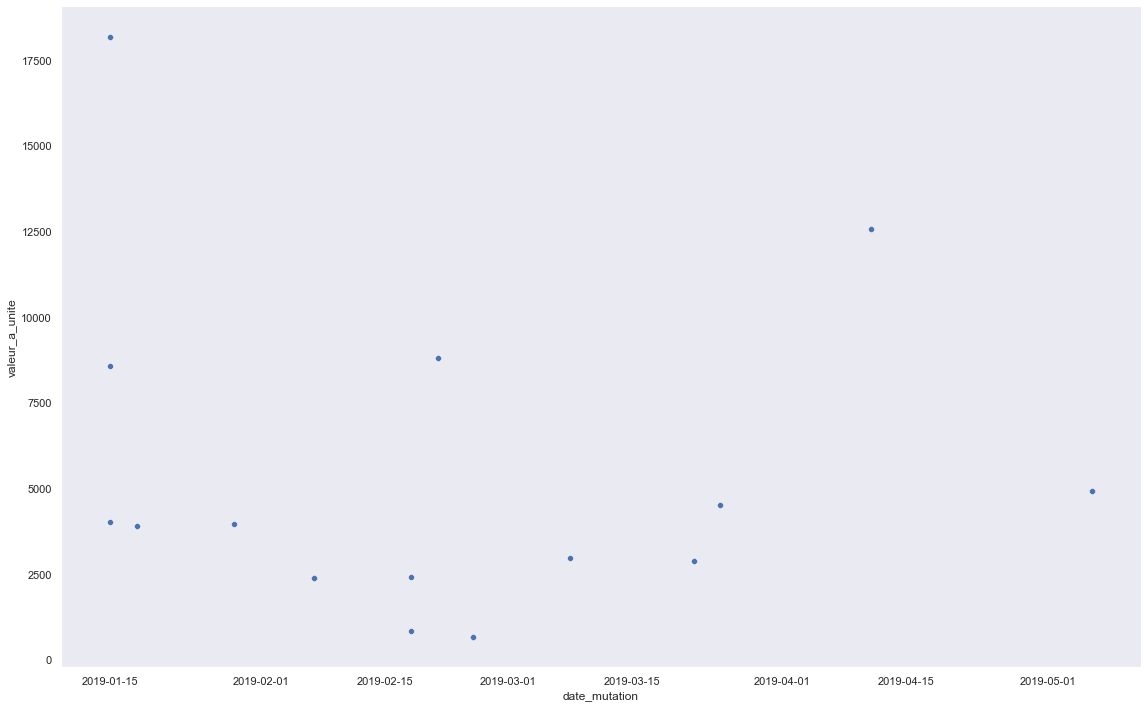

661.993769470405 18181.81818181818
(434, 18)


In [52]:
for zipcode in zipcodes:
    df_tmp = df[df["code_postal"] == zipcode]
    df_tmp["valeur_a_unite"] = df_tmp["valeur_fonciere"] / df_tmp["surface_terrain"]
    df_tmp = df_tmp[df_tmp.year == 2019]
    seaborn.relplot(x=df_tmp["date_mutation"], y=df_tmp["valeur_a_unite"])
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.grid(False)
    print(df_tmp["valeur_a_unite"].min(),df_tmp["valeur_a_unite"].max())
    print(df_tmp.shape)
    del df_tmp

In [126]:
interesting = df[df["nombre_pieces_principales"] == 2]
interesting = interesting[interesting["surface_terrain"].notna()] 
interesting = interesting.drop(["articles_1", "articles_2", "articles_3", 
                                "articles_4", "articles_5", "numero_disposition",
                                "reference_document", "code_service_ch", "commune", 
                                 "code_departement", "code_commune", "prefixe_section",
                                 "section", "numero_plan", "numero_volume", 'lot_1', 
                                 'surface_lot_1', 'lot_2', 'surface_lot_2', 'lot_3',
                                 'surface_lot_3', 'lot_4', 'surface_lot_4', 'lot_5', 'surface_lot_51',
                                 'nombre_lots', 'code_type_local', 'type_local', 'identifiant_local',
                                 'surface_relle_bati', "nature_culture_speciale", "geom", "date_mutation"], 1)
interesting.tail(5)

,nature_mutation,valeur_fonciere,numero_voie,suffixe_numero,type_voie,code_voie,voie,code_postal,nombre_pieces_principales,nature_culture,surface_terrain,lat,lon,day,month,year
37768,Vente,1661960.0,99,None,BD,0693,BAILLE,13005,2.0,S,150.0,43.287995,5.390468,28,6,2019
37753,Vente,1661960.0,99,None,BD,0693,BAILLE,13005,2.0,S,150.0,43.287995,5.390468,28,6,2019
37757,Vente,1661960.0,99,None,BD,0693,BAILLE,13005,2.0,S,150.0,43.287995,5.390468,28,6,2019
37759,Vente,1661960.0,99,None,BD,0693,BAILLE,13005,2.0,S,150.0,43.287995,5.390468,28,6,2019
37754,Vente,1661960.0,99,None,BD,0693,BAILLE,13005,2.0,S,150.0,43.287995,5.390468,28,6,2019


In [127]:
interesting = interesting[interesting["surface_terrain"] >= 50]
interesting.shape

(1851, 16)

In [133]:
interesting = interesting[interesting["valeur_fonciere"] != interesting["valeur_fonciere"].max()]

In [146]:
interesting = interesting[interesting["surface_terrain"] <= 80]

In [161]:
interesting = interesting[interesting["year"] == 2019]

In [159]:
interesting.sort_values(by="code_postal", inplace=True)
interesting.tail(25)

,nature_mutation,valeur_fonciere,numero_voie,suffixe_numero,type_voie,code_voie,voie,code_postal,nombre_pieces_principales,nature_culture,surface_terrain,lat,lon,day,month,year
349,Vente,140000.0,45,None,RUE,7051,DES PETITES MARIES,13001,2.0,S,58.0,43.301701,5.378755,18,2,2019
964,Vente,325000.0,3,None,RUE,2751,DELILLE,13001,2.0,S,66.0,43.300322,5.383216,6,5,2019
965,Vente,325000.0,3,None,RUE,2751,DELILLE,13001,2.0,S,66.0,43.300322,5.383216,6,5,2019
967,Vente,325000.0,3,None,RUE,2751,DELILLE,13001,2.0,S,66.0,43.300322,5.383216,6,5,2019
966,Vente,325000.0,3,None,RUE,2751,DELILLE,13001,2.0,S,66.0,43.300322,5.383216,6,5,2019
14413,Vente,100000.0,20,None,RUE,2872,DOCTEUR LEON PERRIN,13003,2.0,S,63.0,43.314366,5.388245,15,5,2019
14800,Vente,220000.0,8,None,RUE,7779,RAYMONDINO,13003,2.0,S,55.0,43.312345,5.388257,26,3,2019
14799,Vente,220000.0,8,None,RUE,7779,RAYMONDINO,13003,2.0,S,55.0,43.312345,5.388257,26,3,2019
14796,Vente,220000.0,8,None,RUE,7779,RAYMONDINO,13003,2.0,S,55.0,43.312345,5.388257,26,3,2019
49116,Vente,294000.0,10,None,RUE,8313,ST FRANCOIS D ASSISE,13006,2.0,S,74.0,43.281341,5.373312,18,6,2019


In [160]:
interesting.sort_values(by="valeur_fonciere", inplace=True)
interesting.tail(25)

,nature_mutation,valeur_fonciere,numero_voie,suffixe_numero,type_voie,code_voie,voie,code_postal,nombre_pieces_principales,nature_culture,surface_terrain,lat,lon,day,month,year
14413,Vente,100000.0,20,None,RUE,2872,DOCTEUR LEON PERRIN,13003,2.0,S,63.0,43.314366,5.388245,15,5,2019
349,Vente,140000.0,45,None,RUE,7051,DES PETITES MARIES,13001,2.0,S,58.0,43.301701,5.378755,18,2,2019
58562,Vente,172000.0,9080,None,CHE,2613,DES CROISETTES,13008,2.0,S,52.0,43.214931,5.345441,31,1,2019
81340,Vente,200000.0,74,None,RUE,3119,EMILE ZOLA,13009,2.0,S,62.0,43.246639,5.402344,28,3,2019
14800,Vente,220000.0,8,None,RUE,7779,RAYMONDINO,13003,2.0,S,55.0,43.312345,5.388257,26,3,2019
14799,Vente,220000.0,8,None,RUE,7779,RAYMONDINO,13003,2.0,S,55.0,43.312345,5.388257,26,3,2019
14796,Vente,220000.0,8,None,RUE,7779,RAYMONDINO,13003,2.0,S,55.0,43.312345,5.388257,26,3,2019
49214,Vente,249000.0,29,A,RUE,8388,SAINT LEOPOLD,13006,2.0,S,65.0,43.280579,5.377769,14,6,2019
49163,Vente,252000.0,35,None,RUE,3626,FORT DU SANCTUAIRE,13006,2.0,S,60.0,43.283696,5.373729,18,3,2019
49115,Vente,255000.0,10,None,RUE,8313,ST FRANCOIS D ASSISE,13006,2.0,S,74.0,43.281341,5.373312,13,2,2019
